In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

$\textbf{1-D Advection equation } $
\begin{equation}
       \partial_t u + \partial_x u = 0, 
\end{equation}

$\textbf{Algorithm 4.1 Reconstruct-evolve-average } $(Leveuqe FVM red book pg 76)
1. Reconstruct a piecewise polynomial function $\tilde{q}^n(x, t_n)$ defined for all x, from the cell
averages $Q_n$
In the simplest case this is a piecewise constant function that takes the
value $Q_n$ in the ith grid cell, i.e.,
$$\tilde{q}^n(x, t_n) = Q_i^n \text{ for all x} \in C_i$$

2. Evolve the hyperbolic equation exactly (or approximately) with this initial data to obtain
$\tilde{q}^n(x, t_{n+1})$ a time $\Delta t$ later.

3. Average this function over each grid cell to obtain new cell averages
$$Q_i^{n+1} = \frac{1}{\Delta x} \int_{C_i} \tilde{q}^n(x, t_{n+1}) dx


In [2]:
# def rea(x, Q, dt, a):
#     n = len(x)
#     dx = x[1] - x[0]
#     Q_new = np.zeros_like(Q)  # Initialize the new cell averages

#     # Step 1: Reconstruct
#     Q_tilde = np.zeros(n)  # Initialize the piecewise polynomial function

#     # Simplest case: piecewise constant function
#     for i in range(n):
#         Q_tilde[i] = Q[i]  # Assign cell average to each grid cell

#     # Step 2: Evolve
#     Q_tilde_next = np.copy(Q_tilde)

#     # Step 3: Average
#     for i in range(n):
#         Q_new[i] = np.mean(Q_tilde_next[i-1:i+1])  # Average over each grid cell

#     return Q_new

# def rea(x, Q, dt, a):
#     n = len(x)
#     dx = x[1] - x[0]
#     Q_new = np.zeros_like(Q)  # Initialize the new cell averages

#     # Step 1: Reconstruct
#     Q_tilde = np.zeros(n)  # Initialize the piecewise polynomial function
#     for i in range(n):
#         Q_tilde[i] = Q[i]  # Assign cell average to each grid cell

#     # Step 2: Evolve
#     Q_tilde_next = np.zeros_like(Q_tilde)
#     for i in range(n):
#         if a > 0:  # a is the advection speed
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[i] - Q_tilde[i-1])
#         else:
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[(i+1)%n] - Q_tilde[i])

#     # Step 3: Average
#     for i in range(n):
#         Q_new[i] = np.mean(Q_tilde_next[i-1:i+1])  # Average over each grid cell

#     return Q_new

# def rea(x, Q, dt, a):
#     n = len(x)
#     dx = x[1] - x[0]
#     Q_new = np.zeros_like(Q)  # Initialize the new cell averages

#     # Step 1: Reconstruct
#     Q_tilde = np.zeros(n)  # Initialize the piecewise polynomial function
#     for i in range(n):
#         Q_tilde[i] = Q[i]  # Assign cell average to each grid cell

#     # Step 2: Evolve
#     Q_tilde_next = np.zeros_like(Q_tilde)
#     for i in range(n):
#         if a > 0:  # a is the advection speed
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[i] - Q_tilde[i-1])
#         else:
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[(i+1)%n] - Q_tilde[i])

#     # Step 3: Average
#     for i in range(n):
#         if i == 0:
#             Q_new[i] = np.mean(Q_tilde_next[i:i+2])  # Average over the first two elements
#         else:
#             Q_new[i] = np.mean(Q_tilde_next[i-1:i+1])  # Average over each grid cell

#     return Q_new


# def rea(x, Q, dt, a):
#     n = len(x)
#     dx = x[1] - x[0]
#     Q_new = np.zeros_like(Q)  # Initialize the new cell averages

#     # Step 1: Reconstruct
#     Q_tilde = np.copy(Q)  # No need to initialize Q_tilde separately, just copy Q

#     # Step 2: Evolve
#     Q_tilde_next = np.zeros_like(Q)  # Initialize Q_tilde_next
#     for i in range(n):
#         if a > 0:  # a is the advection speed
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[i] - Q_tilde[i-1])
#         else:  # Handle periodic boundary condition
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[(i+1)%n] - Q_tilde[i])

#     # Step 3: Average
#     for i in range(n):
#         # Handle averaging at boundaries
#         if i == 0:
#             Q_new[i] = (Q_tilde_next[i] + Q_tilde_next[i+1]) / 2
#         elif i == n - 1:
#             Q_new[i] = (Q_tilde_next[i-1] + Q_tilde_next[i]) / 2
#         else:
#             Q_new[i] = (Q_tilde_next[i-1] + Q_tilde_next[i] + Q_tilde_next[i+1]) / 3

#     return Q_new


# def rea(x, Q, dt, a):
#     n = len(x)
#     dx = x[1] - x[0]
#     Q_new = np.zeros_like(Q)  # Initialize the new cell averages

#     # Step 1: Reconstruct
#     Q_tilde = np.copy(Q)  # Initialize the piecewise polynomial function

#     # Step 2: Evolve
#     Q_tilde_next = np.zeros_like(Q_tilde)
#     for i in range(n):
#         if a > 0:  # a is the advection speed
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[i] - Q_tilde[i-1])
#         else:
#             # Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[(i+1)%n] - Q_tilde[i])
#             Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[(i)] - Q_tilde[(i+1)%n])

#     # Step 3: Average
#     for i in range(n):
#         # Handle periodic boundary condition
#         Q_new[i] = (Q_tilde_next[(i-1)%n] + Q_tilde_next[i]) / 2

#     return Q_new



# def rea(x, Q_initial, dt, a, T):
#     n = len(x)
#     dx = x[1] - x[0]
#     Q = np.copy(Q_initial)  # Initialize Q

#     # Define time parameters
#     t = 0

#     # Loop over time steps until reaching the final time T
#     while t < T:
#         Q_tilde = np.copy(Q)  # Reconstruct

#         Q_tilde_next = np.zeros_like(Q_tilde)  # Initialize Q_tilde_next
#         for i in range(n):
#             if a > 0:  # a is the advection speed
#                 Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[i] - Q_tilde[i-1])
#             else:
#                 Q_tilde_next[i] = Q_tilde[i] - dt/dx * a * (Q_tilde[i] - Q_tilde[(i+1)%n])

#         # Average
#         for i in range(n):
#             Q[i] = (Q_tilde_next[(i-1)%n] + Q_tilde_next[i]) / 2

#         # Update time
#         t += dt

#     return Q

def rea(x, Q_initial, dt, a, T):
    n = len(x)
    dx = x[1] - x[0]
    Q = np.copy(Q_initial)  # Initialize Q

    # Define time parameters
    t = 0

    # Loop over time steps until reaching the final time T
    while t < T:
        Q_next = np.zeros_like(Q)  # Initialize Q_next
        for i in range(n):
            # Use upwind scheme based on the sign of a
            if a > 0:  # a is the advection speed
                Q_next[i] = Q[i] - dt/dx * a * (Q[i] - Q[i-1 if i > 0 else i])
            else:
                Q_next[i] = Q[i] - dt/dx * a * (Q[(i+1)%n] - Q[i])

        Q = Q_next  # Update Q
        Q[-1] = Q[0]

        # Update time
        t += dt

    return Q




In [3]:
def rea(x, Q_initial, dt, a, T):
    n = len(x)
    dx = x[1] - x[0]
    Q = np.copy(Q_initial)  # Initialize Q

    # Define time parameters
    t = 0

    # Loop over time steps until reaching the final time T
    while t < T:
        Q_next = np.zeros_like(Q)  # Initialize Q_next
        for i in range(n):
            # Use upwind scheme based on the sign of a
            if a > 0:  # a is the advection speed
                Q_next[i] = Q[i] - dt/dx * a * (Q[i] - Q[i-1 if i > 0 else i])
            else:
                Q_next[i] = Q[i] - dt/dx * a * (Q[(i+1)%n] - Q[i])

        Q = Q_next  # Update Q
        Q[-1] = Q[0]

        # Update time
        t += dt

    return Q



# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define the initial condition function g(x)
def g(x):
    return np.where(x <= 0, 2, 1)

# Initialize lists to store h values and errors
h_values = []
errors = []

# Time interval
T = 0.25
 # Advection speed
c = 1


# Run the function for each k value
for k in range(2, 7):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.9 * h / c

    # Initial 
    Q = g(x)  # Use the entire spatial grid

   

    # Number of time steps
    # num_steps = k  # Use k as the number of time steps
    num_steps = int(T/dt)#number of time steps needed

    # Apply the REA algorithm
    for _ in range(num_steps):
        Q = rea(x,Q,dt,c, T)  

    # Compute the exact solution at final time
    u_exact = g(x - c*T)
    # u_exact = g(x)

    # Compute the error at final time
    error = np.linalg.norm(np.abs(Q - u_exact), ord=1)

    # Store h and error
    h_values.append(h)
    errors.append(error*h)




print(f'Q = {Q} \n\n exact = {g(x-T)}')

Q = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2] 

 exact = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


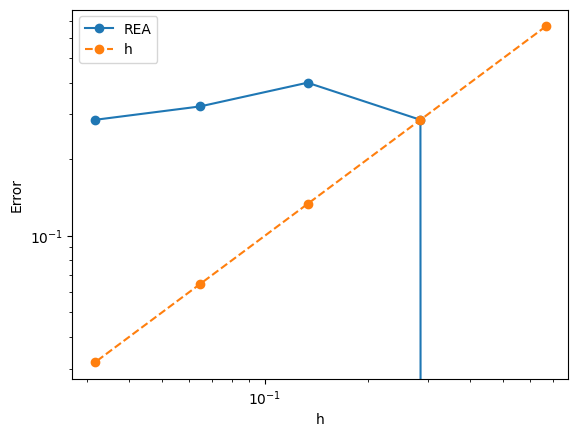

In [4]:
# Plot the convergence
plt.loglog(h_values, errors, 'o-', label='REA')
plt.loglog(h_values, h_values, '--o', label='h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

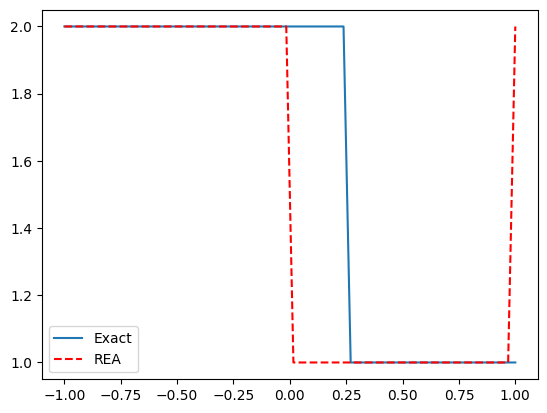

In [5]:
plt.plot(x,g(x-T),label = 'Exact')
plt.plot(x,Q,'--r', label = 'REA')
plt.legend()

In [6]:
# def rea(x,k,dt,a,u0):
#   n = len(x)-1 #number of cells
#   cell_avg = np.empty(n)
#   for i in range(n): #first reconstruction: piecewise constant average
#     if x[i] < 0 and x[i+1] > 0: #contains initial discontinuity at x=0
#       cell_avg[i] = (u0[i]*(-x[i])+u0[i+1](x[i+1]))/h
#     elif x[i] < 0 and x[i+1] <0: #cell fully to the left of initial discontinuity at x=0
#       cell_avg[i] = (u0[i])/h
#     else: #cell fully to the right of initial discontinuity at x=0
#       cell_avg[i] = (u0[i])/h

#     print(cell_avg)
#   for j in range(k): #evolution
#     discont = j*dt*a #location of discontinuity advected from 0
#     if discont > x[n+1]: #if discontinuity passes by periodic boundary, adjust location by domain size
#       discont -=(x[n+1]-x[0])
#     discont_per = discont + x[0]#location of discontinuity advected from left boundary
#     for i in range(n): #averaging and reconstruction per time step
#       if x[i]<discont and x[i+1]>discont: #cell containing discontinuity initially advected from 0
#         (u0[0](discont - x[i]) + u0[n+1](x[i+1]-discont))/h
#       elif x[i]<discont_per and x[i+1]>discont_per: #cell containing discontinuity initially advected from u_L
#         (u0[0](discont_per - x[i]) + u0[n+1](x[i+1]-discont_per))/h
#       elif discont<=0 and x[i+1]<discont: #cell fully contained in u_L area, discont to left (or equal) of 0
#         cell_avg[i] = u0[0]
#       elif discont>0 and x[i+1]<discont and x[i]>discont_per: #cell fully contained in u_L area, discont to right of 0
#         cell_avg[i] = u0[0]
#       elif discont<=0 and x[i]>discont and x[i+1]<discont_per: #cell fully contained in u_R area, discont to left (or equal) of 0
#         cell_avg[i] = u0[n+1]
#       elif discont>0 and x[i]>discont: #cell fully contained in u_R area, discont to right of 0
#         cell_avg[i] = u0[n+1]
#   return cell_avgthe 

In [7]:
# def rea(h, n_nodes, x, k, dt, a, u0):
#     h = h * (n_nodes - 1)
#     n = len(x) - 1  # number of cells
#     cell_avg = np.empty(n)
    
#     for i in range(n):  # first reconstruction: piecewise constant average
#         if x[i] < 0 and x[i+1] > 0:  # contains initial discontinuity at x=0
#             cell_avg[i] = (u0[i]*(-x[i]) + u0[i+1]*x[i+1]) / h
#         elif x[i] < 0 and x[i+1] < 0:  # cell fully to the left of initial discontinuity at x=0
#             cell_avg[i] = u0[i]
#         else:  # cell fully to the right of initial discontinuity at x=0
#             cell_avg[i] = u0[i+1]

#     for j in range(k):  # evolution
#         discont = j * dt * a  # location of discontinuity advected from 0
#         if discont > x[n]:  # if discontinuity passes by periodic boundary, adjust location by domain size
#             discont -= (x[n] - x[0])
#         discont_per = discont + x[0]  # location of discontinuity advected from left boundary
        
#         for i in range(n):  # averaging and reconstruction per time step
#             if x[i] < discont and x[i+1] > discont:  # cell containing discontinuity initially advected from 0
#                 cell_avg[i] = (u0[0]*(discont - x[i]) + u0[n]*(x[i+1] - discont)) / h
#             elif x[i] < discont_per and x[i+1] > discont_per:  # cell containing discontinuity initially advected from u_L
#                 cell_avg[i] = (u0[0]*(discont_per - x[i]) + u0[n]*(x[i+1] - discont_per)) / h
#             elif discont <= 0 and x[i+1] < discont:  # cell fully contained in u_L area, discont to left (or equal) of 0
#                 cell_avg[i] = u0[0]
#             elif discont > 0 and x[i+1] < discont and x[i] > discont_per:  # cell fully contained in u_L area, discont to right of 0
#                 cell_avg[i] = u0[0]
#             elif discont <= 0 and x[i] > discont and x[i+1] < discont_per:  # cell fully contained in u_R area, discont to left (or equal) of 0
#                 cell_avg[i] = u0[n]
#             elif discont > 0 and x[i] > discont:  # cell fully contained in u_R area, discont to right of 0
#                 cell_avg[i] = u0[n]
#     return cell_avg


Godunov flux function for convex scalar conservation law (Leveque Red p228)

$$F_{i-\frac{1}{2}}^n = \begin{cases}
    f(Q_{i-1}) & \text{if } Q_{i-1} > q_s &\text{and} &s > 0\\
    f(Q_i) & \text{if } Q_i < q_s &\text{and} &s < 0\\
    f(q_s) & \text{if } & Q_{i-1} < q_s < Q_i\\

    \end{cases}
$$

$s$ = $\frac{[f(Q_i) - f(Q_{i-1})]}{Q_i - Q_{i-1}} $

Godunov method reduced to the first-order upwind method

$$Q^{n+1}_i = Q_i - \frac{\Delta t}{\Delta x}[f(Q_i)-f(Q_{i-1})] $$

$q_s$ is the unique value of q for which $f'(q_s) = 0$


In [8]:
#Def for advection equation 

# mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 1, 2)

# exact solution function f(x, t)
def f_exact(x, t):
    return g(x - c * t)

# flux function for advection 
def flux(q):
    return c * q

# Rieman solver based on speed 
def solve_riemann(ql, qr, c):
    # c = (flux(qr) - flux(ql)) / ((qr - ql)+1e-10)
    if c > 0:
        return ql
    else:
        return qr

# Godunov solver function
def godunov_solver(n_nodes, T):
    # x_l = -1  # Define the left boundary
    # x_r = 1   # Define the right boundary
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    # dt = 0.005
    dt = 0.9 * dx / c  
    N = n_nodes  # Number of nodes

    # Initialize solution array
    u = g(x)  # Initialize u with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        u_old = u.copy()
        for i in range(1, N - 1):
            ql = u_old[i - 1]
            qr = u_old[i]
            q_left = solve_riemann(ql, qr, c)
            ql = u_old[i]
            qr = u_old[i + 1]
            q_right = solve_riemann(ql, qr, c)
            f_left = flux(q_left)
            f_right = flux(q_right)
            u[i] = u_old[i] - dt / dx * (f_right - f_left)
            #update boundary conditions
            u[0] = u[-1]
            # u[-1] = u[1]
            # u[0] = g(x[0] - c*t)  # Dirichlet boundary condition at x_l
            # u[-1] = g(x[-1] - c*t)  # Dirichlet boundary condition at x_r
        t += dt
    
    return u, x


# Perform the convergence analysis
errors = []
h_val = []

T = 0.25   #final time
c = 1   #speed for advection 
x_r  = 1
x_l = -1


k_values = range(2, 7)
for k in k_values:
    n_nodes = 2 ** k + 1
    u, x  = godunov_solver(n_nodes, T)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x, T), ord=1)
    h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# Display the errors
for i, error in enumerate(errors):
    print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")


Error for n_nodes=5: 1.0
Error for n_nodes=9: 0.5
Error for n_nodes=17: 0.25
Error for n_nodes=33: 0.125
Error for n_nodes=65: 0.0625


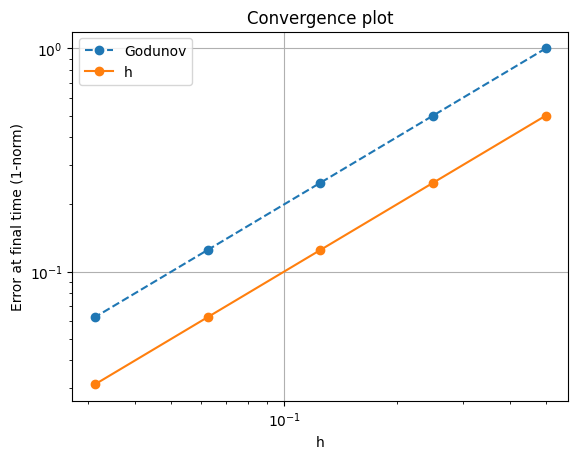

In [9]:
# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

Plot u and u_exact check initial data and boundary conditions and work in REA

Print one time step 
    1. if too fast issue with flux
    2. if it goesd down somthing is wrong with edges
    *keep track of where the bump is to keep track 

In [10]:
#Remove cell for final jupyter notebook

# plt.plot(x,u,label = 'Exact')
# plt.plot(x,f_exact(x, T),'--r', label = 'Godunov')
# plt.legend()

In [11]:
#Remove cell for final jupyter notebook

# print(f'u = {u} \n\n exact = {f_exact(x, T)}')

Here you seek a numerical solution of $\textbf{Burgers' equation}$

\begin{equation}
       \partial_t u + \frac{1}{2}\partial_x u^2 = 0, 
\end{equation}

in the domain $\Omega = [-1,1]$ and a time interval $[0,0.25]$. The boundary condition is $u(0,t) = 3$ and the initial condition is 
    
\begin{equation}
    u(x,0) = \left\{
    \begin{aligned}
        3, &\,\,\quad ~if \quad x<0 ,\\
        1 &\,\, \quad ~if \quad x>0.
    \end{aligned}
    \right.
\end{equation}

Given Piecewise constant initial data $u_l = 3 > 1 = u_r$  implies this is case 1 where there is a unique weak solution. Appying the Rankine-Hugoniot  condition 

$$\frac{f(u_r)-f(u_l)}{u_l - u_r} =\frac{ \frac{1}{2} 1^2 - \frac{1}{2} 3^2}{1-3} = 2 = s$$

Given s = speed of propogation we our exact solution is: 
$$ u(x, t) = \begin{cases}
    3 & \text{if } x < 2t \\
    1 & \text{if } x \geq 2t
\end{cases}
$$


Godunov's method (Hesthaven p124)
$$u_j^{n+1} = u_j^n - \frac{k}{h}[F_{j+\frac{1}{2}}^n - F_{j-\frac{1}{2}}^n]$$
The scheme is in conservation form by construction ensuring correct shock speeds. Unknown is the cell average rather than the point value as with the finite difference scheme.

Consider Burgers's equation 
$$ u_{j+\frac{1}{2}}^* =   \left\{
\begin{array}{ll}
      u_l, & s \geq 0\\
      u_r, & s < 0\\
\end{array} 
\right.  $$

$$ s = \frac{f(u_l)-f(u_r)}{u_l - u_r}$$

$$u_j^{n+1} = u_j^n - \frac{k}{h} [f(u_{j+\frac{1}{2}}^*) - f(u_{j-\frac{1}{2}}^*)] $$
$u^*$ is computed by solving the Riemann problem exactly and selecting the correct entropy solution.



Leveque Green pg. 144

In [12]:
#Def for burgers equation
#ToDo: change flux, u_initial, u_exact

# mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 3, 1)

# exact solution function f(x, t)
def f_exact(x, t):
    return np.where(x <= 2*t, 3, 1)

# flux function for advection 
def flux(q):
    return np.power(q,2)/2

# Define your solve_riemann function
def solve_riemann(ql, qr, flux):
    # c = (flux(qr) - flux(ql)) / ((qr - ql)+1e-10)
    if c > 0:
        return ql
    else:
        return qr

# Godunov solver function
def godunov_solver(n_nodes, T):
    # x_l = -1  # Define the left boundary
    # x_r = 1   # Define the right boundary
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    dt = dx/c  # CFL condition
    N = n_nodes  # Number of nodes

    # Initialize solution array
    u = g(x)  # Initialize u with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        u_old = u.copy()
        for i in range(1, N - 1):
            ql = u_old[i - 1]
            qr = u_old[i]
            q_left = solve_riemann(ql, qr, flux)
            ql = u_old[i]
            qr = u_old[i + 1]
            q_right = solve_riemann(ql, qr, flux)
            f_left = flux(q_left)
            f_right = flux(q_right)
            u[i] = u_old[i] - dt / dx * (f_right - f_left)
            #update boundary conditions
            # u[0] = u[-2]
            u[-1] = u[1]
        t += dt

    return u, x


# Perform the convergence analysis
errors = []
h_val = []

T = 0.25     #final time
c = 2 #speed for burgers
x_r  = 1
x_l = -1


k_values = range(2, 10)
for k in k_values:
    n_nodes = 2 ** k + 1
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)
    u, x_coords = godunov_solver(n_nodes, T)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x_coords, T), ord=1)
    # h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# Display the errors
for i, error in enumerate(errors):
    print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")


Error for n_nodes=5: 1.0
Error for n_nodes=9: 0.5
Error for n_nodes=17: 0.25
Error for n_nodes=33: 0.125
Error for n_nodes=65: 0.0625
Error for n_nodes=129: 0.03125
Error for n_nodes=257: 0.015625
Error for n_nodes=513: 0.0078125


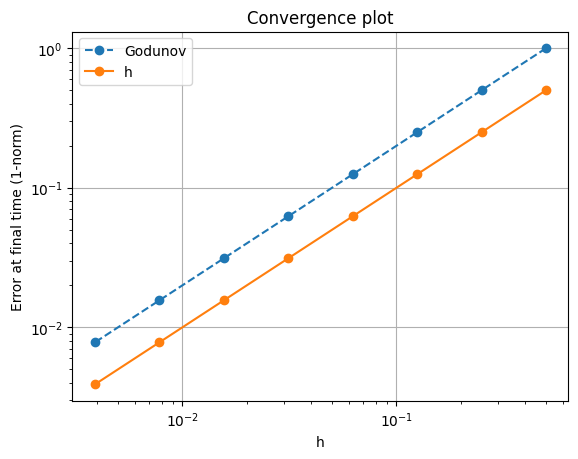

In [13]:
# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#Remove cell for final jupyter notebook
# plt.plot(x,f_exact(x, T), label = 'Exact')
# plt.plot(x,u,'--r', label = 'Godunov')
# plt.legend()